# **DS Assignment 04**

Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.

In [ ]:
import pandas as pd
import numpy as np

#for visualization --
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

Description of features -

CRIM - Per Capita Crime Rate

ZN - Proportion of Residential Land Zoned for Lots over 25,000 sq. ft

INDUS - Proportion of Non-Retail Business Acres

CHAS - Charles River Variable

NOX - Nitric Oxide Concentration

RM - Average number of Rooms

AGE - Proportion of owner-occupied units built before 1940

DIS - Weighted Distances to Boston Employment Centres

RAD - Index of Accessibility to Radial Highways

TAX - Property Tax Rate per 10,000 dollars

PTRATIO - Student — Teacher Ration

B - Proportion of people of African American descent

LSTAT - Percentage of Lower Status of the Population

MEDV - Median value of owner-occupied homes in $1000, i.e., Price of the property

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
df.shape

(506, 14)

In [ ]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [ ]:
#Viewing the data statistics
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#finding the correlation between the features
corr = df.corr()
corr.shape

(14, 14)

<Axes: >

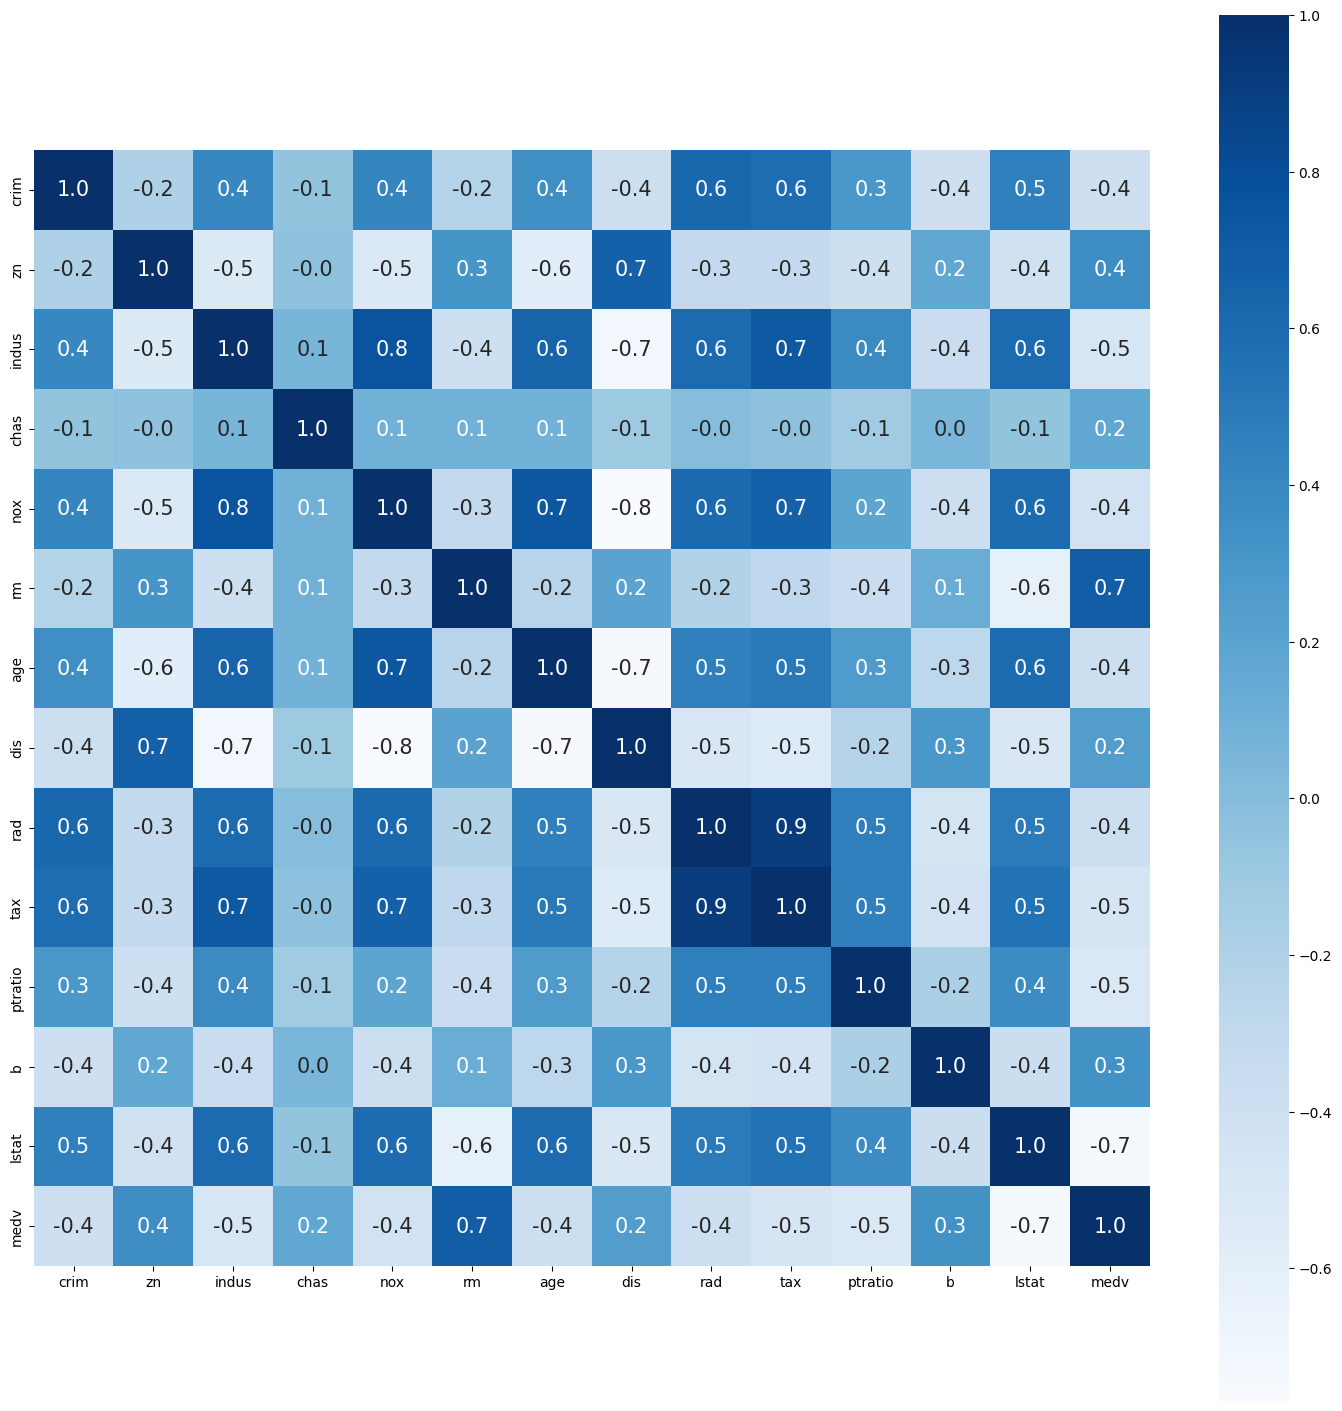

In [ ]:
#plotting the heatmap of correlation
plt.figure(figsize = (18, 18))
sns.heatmap(corr, cbar=True, square =True,fmt='.1f', annot=True, annot_kws={'size':15} ,cmap="Blues")

**Training, Testing and Splitting Data**

In [ ]:
x = df.drop(['medv'], axis= 1)
y = df['medv']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state= 4)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

#train the model using the treaining set
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
lm.intercept_

36.357041376595056

**Model Evaluation**

In [ ]:
#model prediction based on the training data
y_pred = lm.predict(x_train)

#evaluation --
rmse = np.sqrt(np.mean((y_train - y_pred) ** 2))

print('RMSE:', rmse)

RMSE: 4.367343437774162


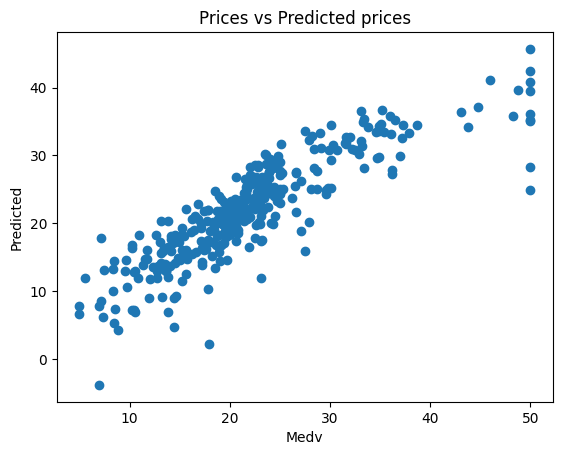

In [ ]:
plt.scatter(y_train, y_pred)
plt.xlabel("Medv")
plt.ylabel("Predicted")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r_sqr = r2_score(y_train, y_pred)

print("R-Squared Value - ", r_sqr)

R-Squared Value -  0.7465991966746854


**Test Data**

In [ ]:
y_test_pred = lm.predict(x_test)

In [ ]:
#model evaluation
#evaluation --
rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
print("rmse: ", rmse)

rmse:  5.4821522513629874


In [ ]:
from sklearn.metrics import r2_score
r_sqr = r2_score(y_test, y_test_pred)

print("R-Squared Value - ", r_sqr)

R-Squared Value -  0.7121818377409181
